## CITS2402 - Introduction to Data Science - Assignment 1.

### Comparing Demographic Trends in Australian Census Data (2021 and 2016)

**Date:** August 2025.

## Declaration

This declaration should be completed and remain attached to the top of your submission.

*I/we am/are aware of the University’s [policy on academic conduct](https://www.uwa.edu.au/policy/-/media/project/uwa/uwa/policy-library/policy/student-administration/academic-integrity/academic-integrity-policy.doc) and I declare that this assignment is entirely the work of the author(s) listed below and that suitable acknowledgement has been made for any sources of information used in preparing it. I have retained a copy for my own records.*

- Name 1: Thomas Graham Nylund
- Student ID 1: 22708177
- Date: 19/09/2025

<hr>

### Introduction
An agency of the federal government, the National Indigenous Australians Agency outlines the concept of 'Closing the Gap' as "priority reforms and ambitious targets that are changing the way governments work to improve life outcomes for Indigenous Australians."[1] These targets cover topics such as health and wellbeing, education and employment, justice, housing, and others. This assignment will use data analysis methods to seek to answer the question: "From 2016 to 2021, has meaningful progress been made to 'Close The Gap' between Indigenous Australians and the broader population of Australia, in terms of health, education and justice outcomes".
<hr>



### Accessing Data
- I began by using the 'DataPacks' on the Census section of the ABS website. I selected the Census years of 2016 and 2021 and changed the 'DataPack type' to 'Aboriginal and/or Torres Strait Islander Peoples (Indigenous) Profile. I changed the geography option to 'Australia' to obtain data that is not specific to a certain region. The reason for not using more specific geographical breakdowns, such as looking at data from an 'SA4' or 'SAL' level is due to the nature of studying data related to Indigenous Persons. For example, when using 'SAL' (suburbs and localities) data, this excludes a large portion of Indigenous people who are 'migratory' and maintain no fixed address. The ABS includes these people in the SAL codes of '9494' and '9797'. The only way to obtain a fair comparison which does not exclude Indigenous people was to use overall data for the whole of Australia.

- I used the Metadata Datapacks to know the full names of the table columns in the datapacks, which I then converted in my dataframes.

### Education
A key metric of closing the gap is Year 12 completion: "School attendance and engagement are key drivers of Target 5 of the National Agreement on Closing the Gap (Year 12 attainment)"[2]. As seen in Figure 1, the percentage of Indigenous Australians who have completed year 12 is substantially less than non-Indigenous Australians (19.57% to 45.46% in 2016). Despite an increase from 2016 to 2021 in Indigenous Year 12 completion of 3.95% from 19.57% to 23.52%, this is still less than the increase in non-Indigenous Australians of 4.04%. This highlights the importance of comparing the two groups when it comes to assessing 'Closing the Gap'. Although education standards for Indigenous people are improving, the gap is still widening, or at least remaining the same. 

The gap in education is also seen in tertiary education. In 2016, 2.78% of Indigenous people had completed a Bachelors degree, compared to 13.37% of non-Indigenous Australians. Despite an increase in of 0.72% to 3.5 in 2021, this is still less than the 1.92% increase to 13.37% for non-Indigenous Australians. This again is demonstrating that despite improvements, the gap is not 'closing'.

2021 Census Year 12 Completion Rates:
   Indigenous_Grad_%  Non_Indigenous_Grad_%
0              23.52                   49.5

2016 Census Year 12 Completion Rates:
   Indigenous_Grad_%  Non_Indigenous_Grad_%
0              19.57                  45.46

Changes from 2016 to 2021:
Indigenous: +3.95 percentage points
Non-Indigenous: +4.04 percentage points


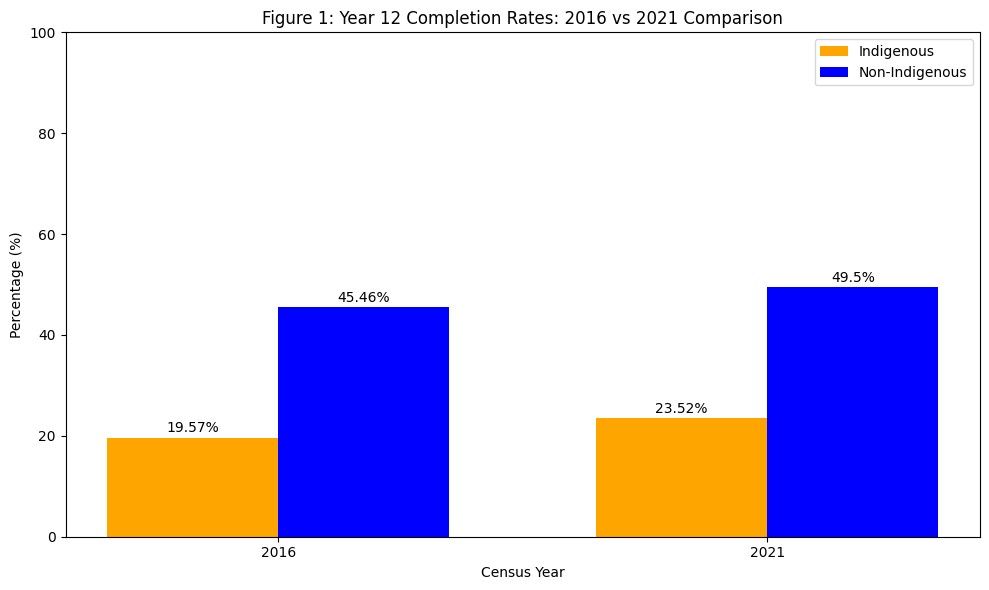

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Load 2021 census totals
totalPeople2021 = pd.read_csv('2021Census_I01A_AUS_AUS.csv')
totalPeople2021 = totalPeople2021[['Tot_p_Indig_P', 'Tot_p_NonInd_P']]
totalPeople2021 = totalPeople2021.rename(columns={
    'Tot_p_Indig_P': 'Total_Indigenous_Population',
    'Tot_p_NonInd_P': 'Total_non_Indigenous_Population'
})

# Load 2021 education completion
education2021 = pd.read_csv('2021Census_I01C_AUS_AUS.csv')
education2021 = education2021[['HYSC_Y12_e_Ind_P','HYSC_Y12_e_No_In_P']]
education2021 = education2021.rename(columns={
    'HYSC_Y12_e_Ind_P': 'Indigenous_Year_12_Completed',
    'HYSC_Y12_e_No_In_P': 'non_Indigenous_Year_12_Completed'
})

# Load 2016 census totals
totalPeople2016 = pd.read_csv('2016Census_I01A_AUS.csv')
totalPeople2016 = totalPeople2016[['Tot_p_Indig_P', 'Tot_p_NonInd_P']]
totalPeople2016 = totalPeople2016.rename(columns={
    'Tot_p_Indig_P': 'Total_Indigenous_Population',
    'Tot_p_NonInd_P': 'Total_non_Indigenous_Population'
})

# Load 2016 education completion
education2016 = pd.read_csv('2016Census_I01B_AUS.csv')
education2016 = education2016[['HYSC_Y12_e_Ind_P','HYSC_Y12_e_No_In_P']]
education2016 = education2016.rename(columns={
    'HYSC_Y12_e_Ind_P': 'Indigenous_Year_12_Completed',
    'HYSC_Y12_e_No_In_P': 'non_Indigenous_Year_12_Completed'
})

# Calculate percentages for 2021
graduation_percentages_2021 = pd.DataFrame()
graduation_percentages_2021['Indigenous_Grad_%'] = (
    education2021['Indigenous_Year_12_Completed'] /
    totalPeople2021['Total_Indigenous_Population'] * 100
).round(2)

graduation_percentages_2021['Non_Indigenous_Grad_%'] = (
    education2021['non_Indigenous_Year_12_Completed'] /
    totalPeople2021['Total_non_Indigenous_Population'] * 100
).round(2)

# Calculate percentages for 2016
graduation_percentages_2016 = pd.DataFrame()
graduation_percentages_2016['Indigenous_Grad_%'] = (
    education2016['Indigenous_Year_12_Completed'] /
    totalPeople2016['Total_Indigenous_Population'] * 100
).round(2)

graduation_percentages_2016['Non_Indigenous_Grad_%'] = (
    education2016['non_Indigenous_Year_12_Completed'] /
    totalPeople2016['Total_non_Indigenous_Population'] * 100
).round(2)

# Print results
print("2021 Census Year 12 Completion Rates:")
print(graduation_percentages_2021)
print("\n2016 Census Year 12 Completion Rates:")
print(graduation_percentages_2016)

# Create comparison dataframe for plotting
comparison_data = pd.DataFrame({
    'Indigenous 2016': graduation_percentages_2016['Indigenous_Grad_%'].iloc[0],
    'Indigenous 2021': graduation_percentages_2021['Indigenous_Grad_%'].iloc[0],
    'Non-Indigenous 2016': graduation_percentages_2016['Non_Indigenous_Grad_%'].iloc[0],
    'Non-Indigenous 2021': graduation_percentages_2021['Non_Indigenous_Grad_%'].iloc[0]
}, index=[0])

# Calculate changes
indigenous_change = graduation_percentages_2021['Indigenous_Grad_%'].iloc[0] - graduation_percentages_2016['Indigenous_Grad_%'].iloc[0]
non_indigenous_change = graduation_percentages_2021['Non_Indigenous_Grad_%'].iloc[0] - graduation_percentages_2016['Non_Indigenous_Grad_%'].iloc[0]

print(f"\nChanges from 2016 to 2021:")
print(f"Indigenous: {indigenous_change:+.2f} percentage points")
print(f"Non-Indigenous: {non_indigenous_change:+.2f} percentage points")

# Create comparison plot showing both years side by side
fig, ax = plt.subplots(figsize=(10, 6))

x = range(2)
width = 0.35

indigenous_values = [graduation_percentages_2016['Indigenous_Grad_%'].iloc[0], 
                    graduation_percentages_2021['Indigenous_Grad_%'].iloc[0]]
non_indigenous_values = [graduation_percentages_2016['Non_Indigenous_Grad_%'].iloc[0], 
                        graduation_percentages_2021['Non_Indigenous_Grad_%'].iloc[0]]

bars1 = ax.bar([i - width/2 for i in x], indigenous_values, width, label='Indigenous', color='orange')
bars2 = ax.bar([i + width/2 for i in x], non_indigenous_values, width, label='Non-Indigenous', color='blue')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height}%', ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Census Year')
ax.set_ylabel('Percentage (%)')
ax.set_title('Figure 1: Year 12 Completion Rates: 2016 vs 2021 Comparison')
ax.set_xticks(x)
ax.set_xticklabels(['2016', '2021'])
ax.legend()
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

2021 Census Bachelors Degree Completion Rates:
   Indigenous_Grad_%  Non_Indigenous_Grad_%
0                3.5                  15.29

2016 Census Bahelors Degree Completion Rates:
   Indigenous_Grad_%  Non_Indigenous_Grad_%
0               2.78                  13.37

Changes from 2016 to 2021:
Indigenous: +0.72 percentage points
Non-Indigenous: +1.92 percentage points


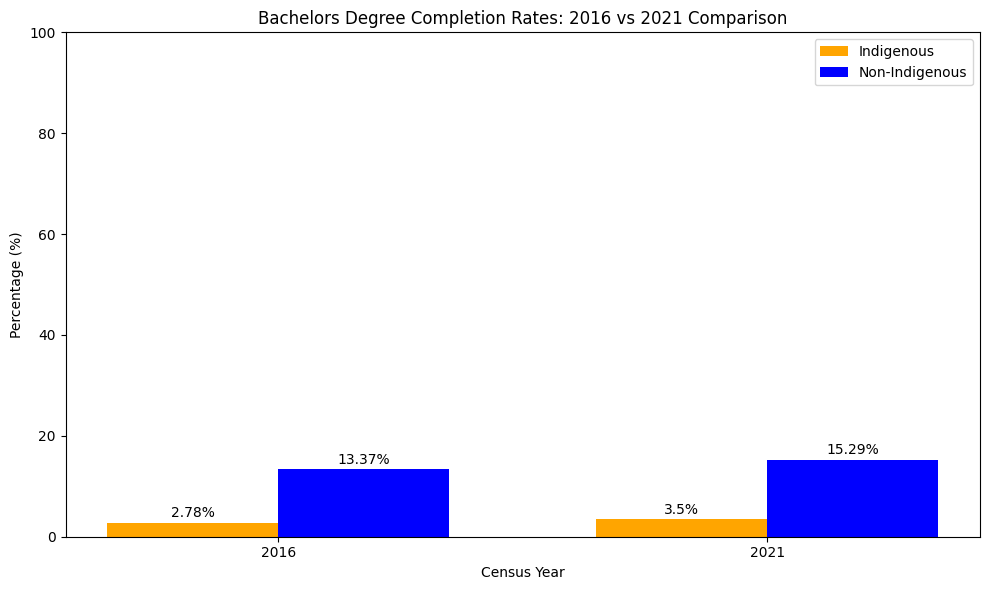

In [95]:
# Load 2021 census totals
totalPeople2021 = pd.read_csv('2021Census_I01A_AUS_AUS.csv')
totalPeople2021 = totalPeople2021[['Tot_p_Indig_P', 'Tot_p_NonInd_P']]
totalPeople2021 = totalPeople2021.rename(columns={
    'Tot_p_Indig_P': 'Total_Indigenous_Population',
    'Tot_p_NonInd_P': 'Total_non_Indigenous_Population'
})

# Load 2021 education completion
education2021 = pd.read_csv('2021Census_I19A_AUS_AUS.csv')
education2021 = education2021[['HnsQ_BDL_Ind_P','HnsQ_BDL_No_Ind_P']]
education2021 = education2021.rename(columns={
    'HnsQ_BDL_Ind_P': 'Indigenous_Bachelors_Completed',
    'HnsQ_BDL_No_Ind_P': 'non_Indigenous_Bachelors_Completed'
})

# Load 2016 census totals
totalPeople2016 = pd.read_csv('2016Census_I01A_AUS.csv')
totalPeople2016 = totalPeople2016[['Tot_p_Indig_P', 'Tot_p_NonInd_P']]
totalPeople2016 = totalPeople2016.rename(columns={
    'Tot_p_Indig_P': 'Total_Indigenous_Population',
    'Tot_p_NonInd_P': 'Total_non_Indigenous_Population'
})

# Load 2016 education completion
education2016 = pd.read_csv('2016Census_I14A_AUS.csv')
education2016 = education2016[['NsQ_BDL_Ind_P','NsQ_BDL_No_Ind_P']]
education2016 = education2016.rename(columns={
    'NsQ_BDL_Ind_P': 'Indigenous_Bachelors_Completed',
    'NsQ_BDL_No_Ind_P': 'non_Indigenous_Bachelors_Completed'
})

# Calculate percentages for 2021
graduation_percentages_2021 = pd.DataFrame()
graduation_percentages_2021['Indigenous_Grad_%'] = (
    education2021['Indigenous_Bachelors_Completed'] /
    totalPeople2021['Total_Indigenous_Population'] * 100
).round(2)

graduation_percentages_2021['Non_Indigenous_Grad_%'] = (
    education2021['non_Indigenous_Bachelors_Completed'] /
    totalPeople2021['Total_non_Indigenous_Population'] * 100
).round(2)

# Calculate percentages for 2016
graduation_percentages_2016 = pd.DataFrame()
graduation_percentages_2016['Indigenous_Grad_%'] = (
    education2016['Indigenous_Bachelors_Completed'] /
    totalPeople2016['Total_Indigenous_Population'] * 100
).round(2)

graduation_percentages_2016['Non_Indigenous_Grad_%'] = (
    education2016['non_Indigenous_Bachelors_Completed'] /
    totalPeople2016['Total_non_Indigenous_Population'] * 100
).round(2)

# Print results
print("2021 Census Bachelors Degree Completion Rates:")
print(graduation_percentages_2021)
print("\n2016 Census Bahelors Degree Completion Rates:")
print(graduation_percentages_2016)

# Create comparison dataframe for plotting
comparison_data = pd.DataFrame({
    'Indigenous 2016': graduation_percentages_2016['Indigenous_Grad_%'].iloc[0],
    'Indigenous 2021': graduation_percentages_2021['Indigenous_Grad_%'].iloc[0],
    'Non-Indigenous 2016': graduation_percentages_2016['Non_Indigenous_Grad_%'].iloc[0],
    'Non-Indigenous 2021': graduation_percentages_2021['Non_Indigenous_Grad_%'].iloc[0]
}, index=[0])

# Calculate changes
indigenous_change = graduation_percentages_2021['Indigenous_Grad_%'].iloc[0] - graduation_percentages_2016['Indigenous_Grad_%'].iloc[0]
non_indigenous_change = graduation_percentages_2021['Non_Indigenous_Grad_%'].iloc[0] - graduation_percentages_2016['Non_Indigenous_Grad_%'].iloc[0]

print(f"\nChanges from 2016 to 2021:")
print(f"Indigenous: {indigenous_change:+.2f} percentage points")
print(f"Non-Indigenous: {non_indigenous_change:+.2f} percentage points")

# Create comparison plot showing both years side by side
fig, ax = plt.subplots(figsize=(10, 6))

x = range(2)
width = 0.35

indigenous_values = [graduation_percentages_2016['Indigenous_Grad_%'].iloc[0], 
                    graduation_percentages_2021['Indigenous_Grad_%'].iloc[0]]
non_indigenous_values = [graduation_percentages_2016['Non_Indigenous_Grad_%'].iloc[0], 
                        graduation_percentages_2021['Non_Indigenous_Grad_%'].iloc[0]]

bars1 = ax.bar([i - width/2 for i in x], indigenous_values, width, label='Indigenous', color='orange')
bars2 = ax.bar([i + width/2 for i in x], non_indigenous_values, width, label='Non-Indigenous', color='blue')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height}%', ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Census Year')
ax.set_ylabel('Percentage (%)')
ax.set_title('Bachelors Degree Completion Rates: 2016 vs 2021 Comparison')
ax.set_xticks(x)
ax.set_xticklabels(['2016', '2021'])
ax.legend()
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

### References
[1] National Indigenous Australians Agency. (n.d.). Closing the Gap. Retrieved September 16, 2025, from https://www.niaa.gov.au/our-work/closing-gap

[2] Australian Government Department of Education. (n.d.). Closing the Gap in school education. Australian Government. https://www.education.gov.au/closing-the-gap/closing-gap-school-education